To work with the top 10,000 popular movies dataset in Python, you can use various libraries such as pandas, numpy, matplotlib, seaborn, and more. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
movies_df = pd.read_csv('Top_10000_Movies.csv', encoding='ISO-8859-1',lineterminator='\n')


## Check the data

In [2]:
movies_df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


Drop unnessry data

In [3]:
movies_df.drop('Unnamed: 0', axis = 1, inplace = True)

## EDA

### Missing values

In [4]:
# check for missing values
print(movies_df.isnull().sum())

movies_df.dropna(inplace=True)

# check again for missing values
print(movies_df.isnull().sum())

id                      0
original_language       0
original_title          0
popularity              0
release_date           38
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 0
runtime                 9
tagline              2920
dtype: int64
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
genre                0
overview             0
revenue              0
runtime              0
tagline              0
dtype: int64


## Ourliers

<AxesSubplot:xlabel='revenue'>

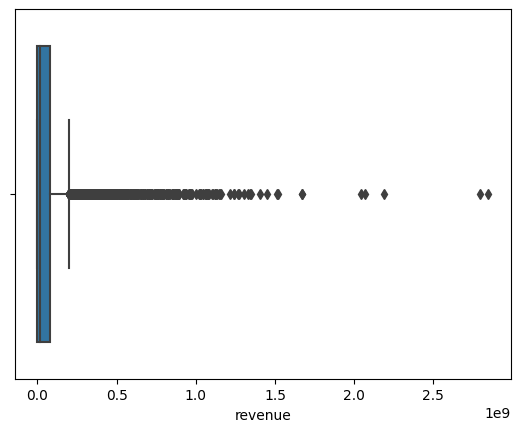

In [5]:
import seaborn as sns

sns.boxplot(x=movies_df['revenue'])

This code uses the Seaborn library to create a box plot of the revenue column. The box plot shows the median value, the interquartile range (IQR), and any data points that fall outside the whiskers (1.5 times the IQR).

### EDTA

In [6]:
# print the list of unique genres
print(movies_df['genre'].unique())

["['Action', 'Adventure', 'Science Fiction', 'Fantasy']"
 "['Action', 'Adventure', 'Science Fiction']"
 "['Action', 'Crime', 'Thriller']" ... "['Adventure', 'TV Movie']"
 "['Documentary', 'Crime', 'Drama']" "['Music', 'Animation']"]


In [7]:
# pick the most popular movies based on overall rating
most_popular_movies = movies_df.sort_values(by=['popularity', 'vote_average'], ascending=False)
print(most_popular_movies.head())

       id original_language       original_title  popularity release_date  \
1  524434                en             Eternals    3365.535   2021-11-03   
2  438631                en                 Dune    2911.423   2021-09-15   
3  796499                en      Army of Thieves    2552.437   2021-10-27   
4  550988                en             Free Guy    1850.470   2021-08-11   
5  574060                en  Gunpowder Milkshake    1453.423   2021-07-14   

   vote_average  vote_count  \
1           7.1         622   
2           8.0        3632   
3           6.9         555   
4           7.8        3493   
5           6.5         347   

                                               genre  \
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   
3                    ['Action', 'Crime', 'Thriller']   
4  ['Comedy', 'Action', 'Adventure', 'Science Fic...   
5                    ['Action', 'Thriller', 'Crime']   

             

In [8]:
# analyze the runtime of the movies
runtime_summary = movies_df['runtime'].describe()
print(runtime_summary)


count    7072.000000
mean      104.411906
std        21.642337
min         0.000000
25%        92.000000
50%       102.000000
75%       115.000000
max       248.000000
Name: runtime, dtype: float64


In [9]:
# analyze the correlation between language and revenue
language_revenue_corr = movies_df[['original_language', 'revenue']].corr()
print(language_revenue_corr)

         revenue
revenue      1.0


In [10]:
# analyze the relationship between popularity and vote count
popularity_vote_count_corr = movies_df[['popularity', 'vote_count']].corr()
print(popularity_vote_count_corr)

            popularity  vote_count
popularity    1.000000    0.159043
vote_count    0.159043    1.000000


In [11]:
# analyze the relationship between rating and revenue
rating_revenue_corr = movies_df[['vote_average', 'revenue']].corr()
print(rating_revenue_corr)

              vote_average   revenue
vote_average      1.000000  0.172201
revenue           0.172201  1.000000


In [12]:
# analyze the relationship between title and tagline
title_tagline_corr = movies_df[['original_title', 'tagline']].corr()
print(title_tagline_corr)

# analyze the relationship between genre and vote count
genre_vote_count = movies_df.groupby('genre')['vote_count'].mean()
print(genre_vote_count)

# analyze the relationship between revenue and vote count
revenue_vote_count = movies_df.groupby('revenue')['vote_count'].mean()
print(revenue_vote_count)

# analyze the relationship between popularity and genre
popularity_genre = movies_df.groupby('genre')['popularity'].mean()
print(popularity_genre)

Empty DataFrame
Columns: []
Index: []
genre
['Action', 'Adventure', 'Animation', 'Comedy', 'Family']                          2010.00
['Action', 'Adventure', 'Animation', 'Family', 'Comedy']                          4464.00
['Action', 'Adventure', 'Animation', 'Family', 'Fantasy', 'Comedy', 'Western']    2397.00
['Action', 'Adventure', 'Animation', 'Family']                                    4362.50
['Action', 'Adventure', 'Animation', 'Fantasy', 'Science Fiction']                 258.00
                                                                                   ...   
['Western', 'Mystery', 'Thriller', 'Drama']                                        787.00
['Western', 'TV Movie']                                                            244.00
['Western', 'Thriller']                                                            541.00
['Western']                                                                       1122.16
[]                                                      

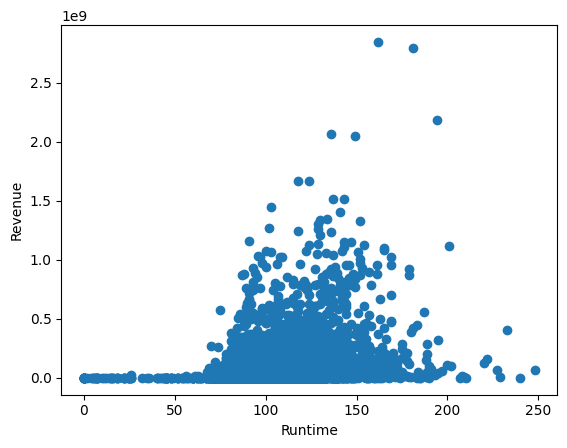

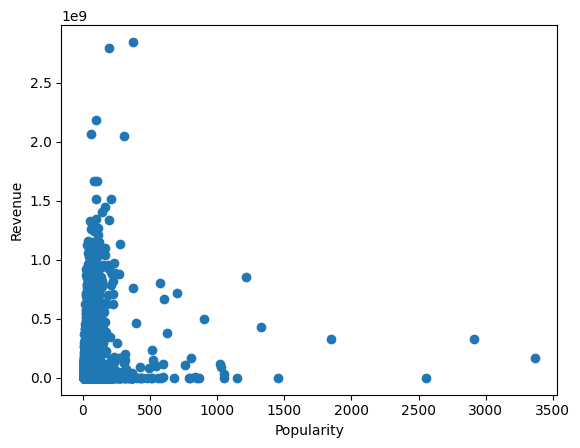

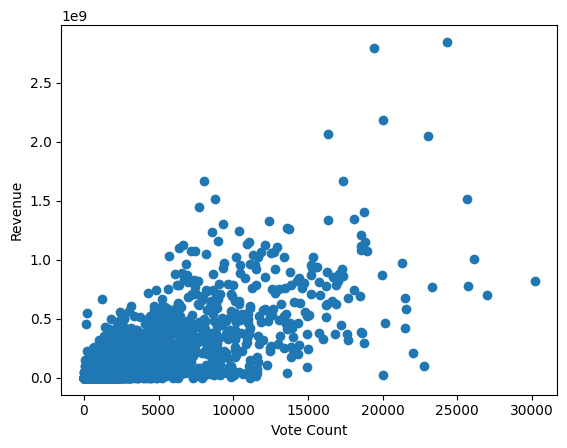

In [18]:
# plot the relationship between runtime and revenue
plt.scatter(movies_df['runtime'], movies_df['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()
 
 
# plot the relationship between popularity and revenue
plt.scatter(movies_df['popularity'], movies_df['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

# plot the relationship between vote count and revenue
plt.scatter(movies_df['vote_count'], movies_df['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

## Visualtion

#### Correlation

In [13]:
dfcorr = movies_df.drop('id',axis = 1).corr()
dfcorr

,popularity,vote_average,vote_count,revenue,runtime
popularity,1.000000,0.074706,0.159043,0.181026,0.065931
vote_average,0.074706,1.000000,0.311902,0.172201,0.367446
vote_count,0.159043,0.311902,1.000000,0.766315,0.326987
revenue,0.181026,0.172201,0.766315,1.000000,0.290753
runtime,0.065931,0.367446,0.326987,0.290753,1.000000


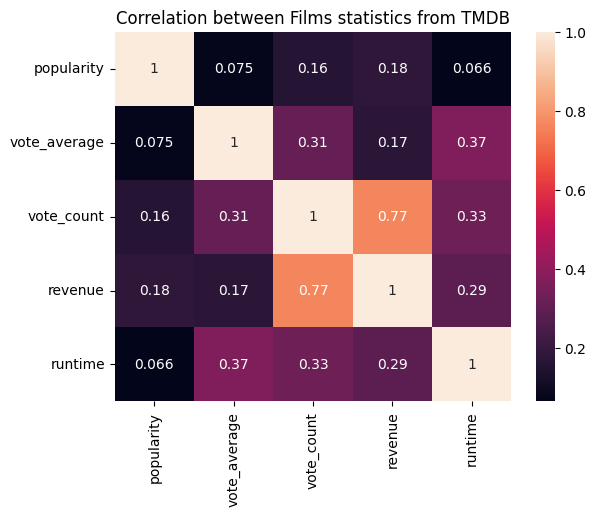

In [14]:
sns.heatmap(dfcorr, annot = True).set(title = 'Correlation between Films statistics from TMDB')
plt.show()

### Pie

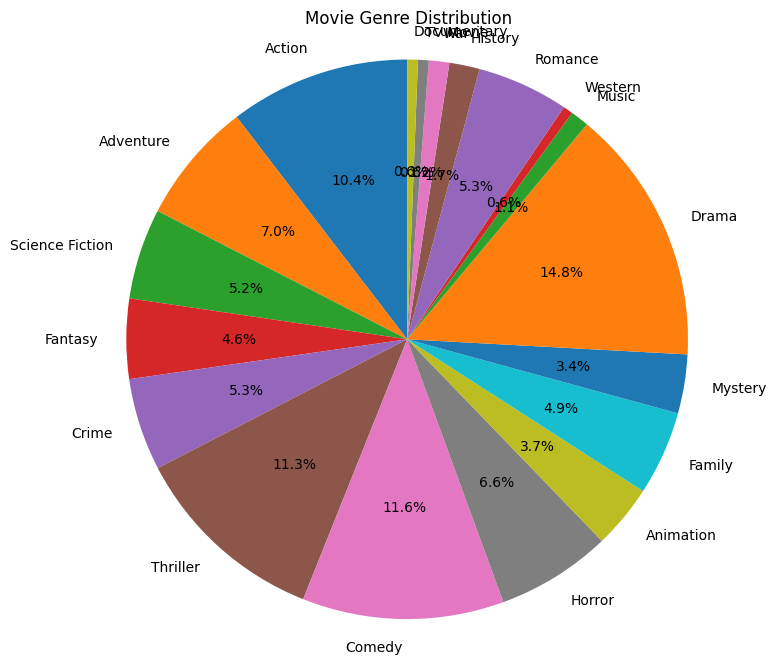

In [15]:
# create a dictionary to store the number of movies in each genre
genre_counts = {}
for genres in movies_df['genre']:
    for genre in eval(genres):
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

# create a list of labels and values for the pie chart
labels = list(genre_counts.keys())
values = list(genre_counts.values())

# create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Movie Genre Distribution')
plt.show()

### Bar plot of the top 10 movies by revenue:

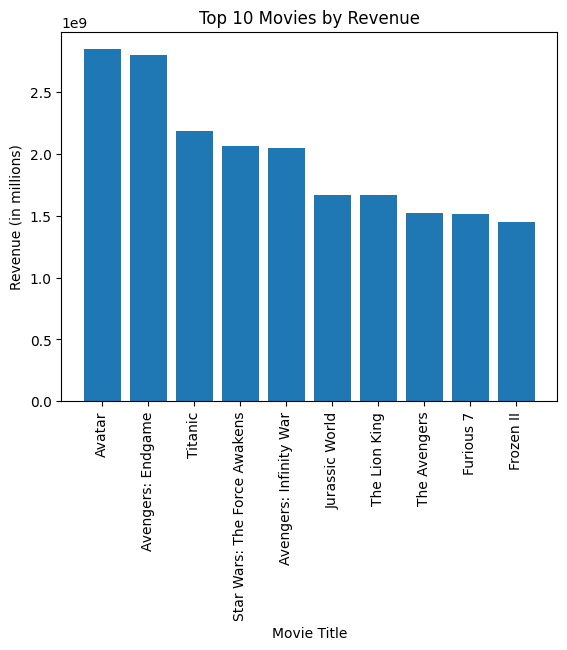

In [16]:
top_revenue = movies_df.sort_values('revenue', ascending=False).head(10)
plt.bar(top_revenue['original_title'], top_revenue['revenue'])
plt.xticks(rotation=90)
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue (in millions)')
plt.show()

### Scatter plot of popularity vs. revenue:

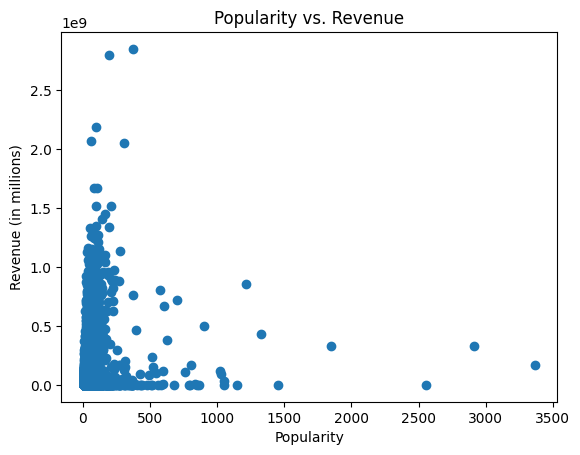

In [17]:
plt.scatter(movies_df['popularity'], movies_df['revenue'])
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (in millions)')
plt.show()

### Histogram of movie runtimes:

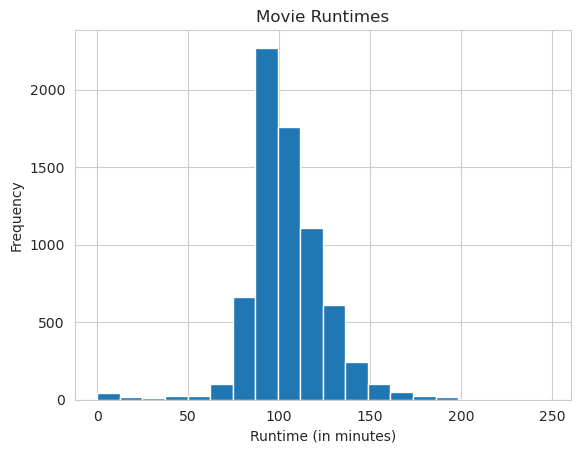

In [107]:
plt.hist(movies_df['runtime'], bins=20)
plt.title('Movie Runtimes')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Frequency')
plt.show()

### Line plot of vote average over time:

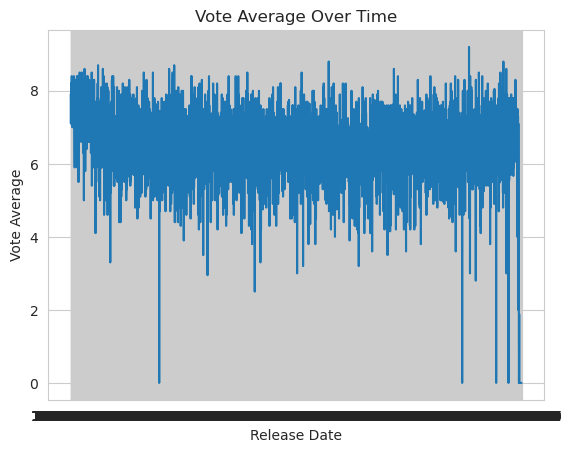

In [108]:
vote_avg_over_time = movies_df.groupby('release_date')['vote_average'].mean()
plt.plot(vote_avg_over_time.index, vote_avg_over_time.values)
plt.title('Vote Average Over Time')
plt.xlabel('Release Date')
plt.ylabel('Vote Average')
plt.show()

### Model

**Content-Based Filtering**: This model recommends items based on the similarity of item attributes or features. It works by identifying the attributes or features of items that a user has previously liked and recommending items with similar attributes or features.

For example, if a user has liked action movies in the past, the content-based filtering model will recommend other action movies with similar attributes such as high-intensity action scenes, fast-paced plot, and high production values.

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a TF-IDF vectorizer to convert movie overviews to numerical vectors
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the overview data to numerical vectors
tfidf_matrix = tfidf.fit_transform(movies_df['overview'].fillna(''))

# Compute the cosine similarity matrix of the tfidf matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get the indices and titles of all the movies
indices = pd.Series(movies_df.index, index=movies_df['original_title']).drop_duplicates()

# Define a function to get movie recommendations based on similarity
def content_recommender(title, cosine_sim=cosine_sim, df=movies_df, indices=indices):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the indices of the top 10 most similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return df['original_title'].iloc[movie_indices]

check for DC dark Night

In [110]:
print(content_recommender('The Dark Knight'))

507               Cherry
4922        The Last Man
3417              Stoker
987       Fantastic Four
836        Don't Breathe
2607         The Patriot
5099      Sound of Metal
8175    The Painted Veil
6101          Assimilate
9214           Black '47
Name: original_title, dtype: object


check for marvel Eternals

In [111]:
recommended_movies =content_recommender('Eternals')

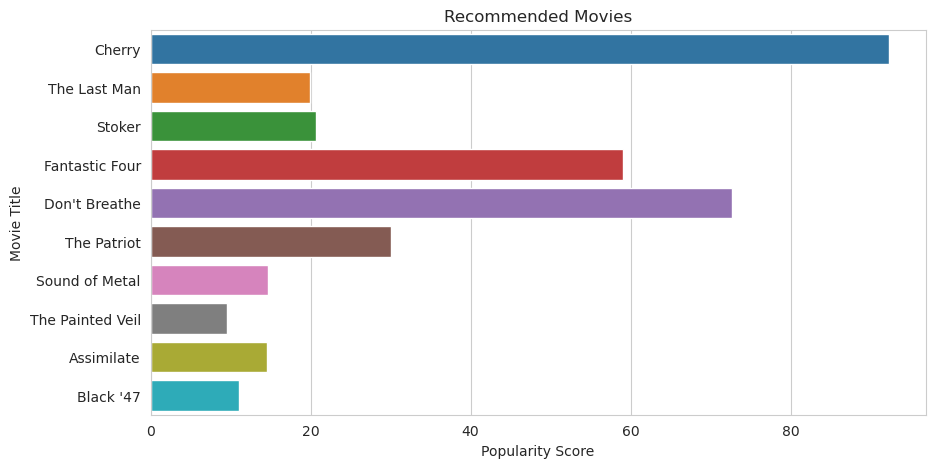

In [112]:
# Call the content_recommender function to get recommended movies based on similarity
movie_title = 'The Dark Knight'
recommended_movies = content_recommender(movie_title)

# Create a DataFrame with movie titles and popularity scores
popularity_scores = [movies_df.loc[movies_df['original_title']==m, 'popularity'].iloc[0] for m in recommended_movies]
movies_df = pd.DataFrame({'Movie Title': recommended_movies, 'Popularity Score': popularity_scores})

# Create a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='Popularity Score', y='Movie Title', data=movies_df)
plt.ylabel('Movie Title')
plt.title('Recommended Movies')
plt.show()